<a href="https://colab.research.google.com/github/Ashwin535/Multi-Class-Animal-Classification/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:05<00:00, 118MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


In [2]:
!pip install tensorflow

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is not being used.


In [5]:
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 90
Classes: ['seal', 'rat', 'fly', 'orangutan', 'koala', 'turkey', 'oyster', 'pigeon', 'jellyfish', 'flamingo', 'zebra', 'rhinoceros', 'bat', 'ladybugs', 'crow', 'dragonfly', 'sparrow', 'horse', 'raccoon', 'turtle', 'porcupine', 'hummingbird', 'leopard', 'octopus', 'mouse', 'hippopotamus', 'squid', 'cockroach', 'seahorse', 'moth', 'fox', 'chimpanzee', 'cow', 'gorilla', 'lizard', 'hedgehog', 'bee', 'butterfly', 'sandpiper', 'deer', 'otter', 'squirrel', 'donkey', 'shark', 'woodpecker', 'boar', 'hamster', 'crab', 'okapi', 'goldfish', 'eagle', 'wolf', 'lobster', 'hornbill', 'bear', 'mosquito', 'coyote', 'goat', 'dog', 'pelecaniformes', 'hyena', 'possum', 'badger', 'hare', 'reindeer', 'dolphin', 'grasshopper', 'whale', 'goose', 'bison', 'beetle', 'wombat', 'sheep', 'pig', 'antelope', 'penguin', 'parrot', 'snake', 'starfish', 'tiger', 'owl', 'cat', 'panda', 'caterpillar', 'swan', 'ox', 'duck', 'lion', 'kangaroo', 'elephant']


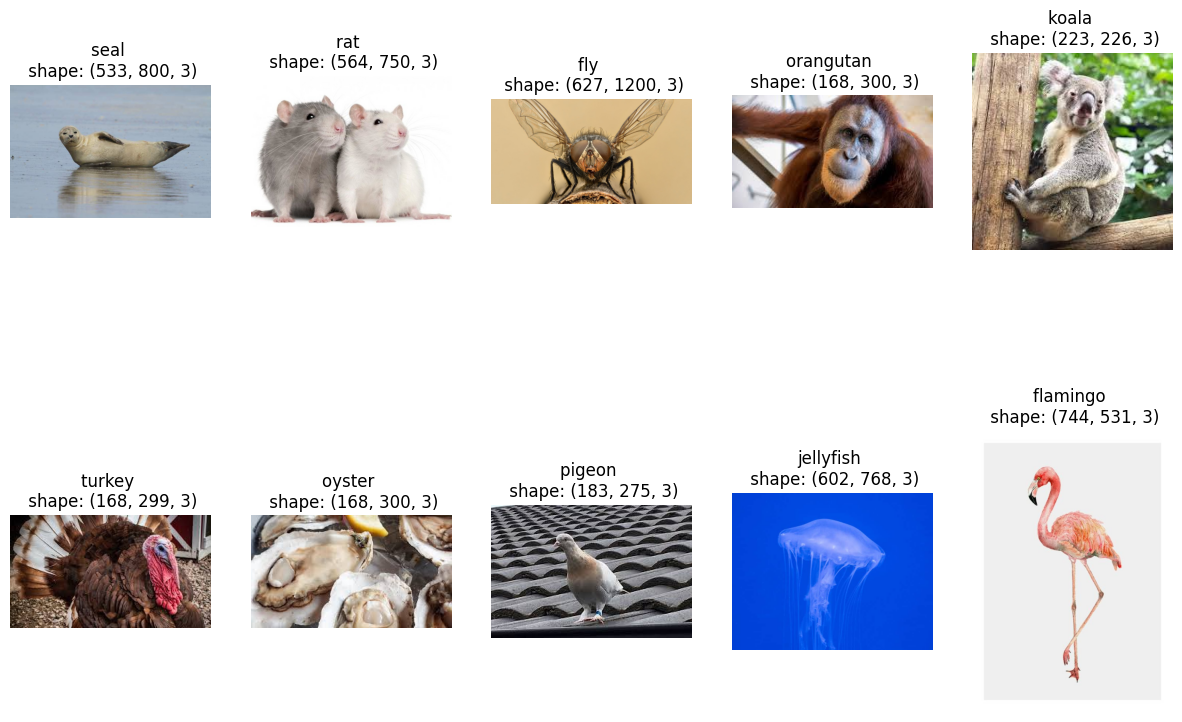

In [6]:
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


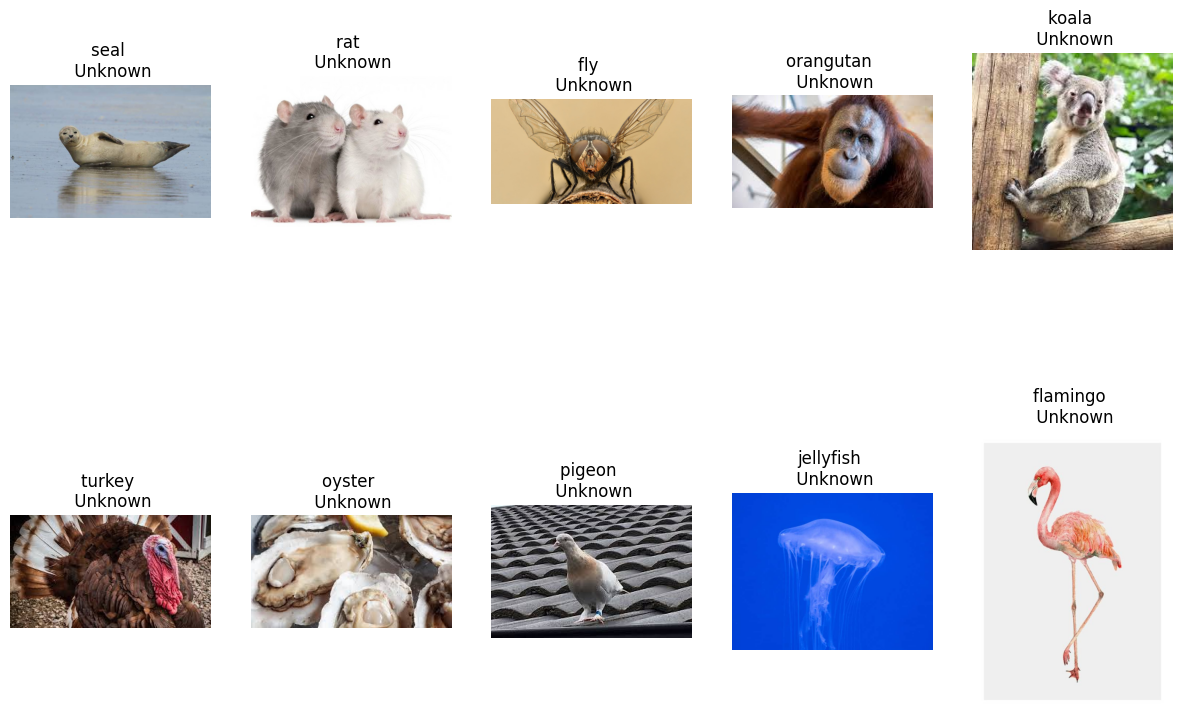

Displayed Animals Count:
seal: 1
rat: 1
fly: 1
orangutan: 1
koala: 1
turkey: 1
oyster: 1
pigeon: 1
jellyfish: 1
flamingo: 1

Extinction Status:
seal: Unknown
rat: Unknown
fly: Unknown
orangutan: Unknown
koala: Unknown
turkey: Unknown
oyster: Unknown
pigeon: Unknown
jellyfish: Unknown
flamingo: Unknown


In [7]:
import matplotlib.pyplot as plt

# Example extinction status dictionary (Modify as needed)
extinction_status = {
    "Tiger": "Endangered",
    "Elephant": "Vulnerable",
    "Panda": "Vulnerable",
    "Gorilla": "Critically Endangered",
    "Koala": "Vulnerable",
    "Polar Bear": "Vulnerable",
    "Rhino": "Critically Endangered",
    "Wolf": "Least Concern",
    "Kangaroo": "Least Concern",
    "Leopard": "Vulnerable"
}

plt.figure(figsize=(15,10))
animal_counts = {}

for i, class_name in enumerate(classes[:10]):
    class_path = os.path.join(dataset_path, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'{class_name} \n {extinction_status.get(class_name, "Unknown")}')
    plt.axis('off')

    # Count occurrences
    animal_counts[class_name] = animal_counts.get(class_name, 0) + 1

plt.show()

# Display count of displayed animals
print("Displayed Animals Count:")
for animal, count in animal_counts.items():
    print(f"{animal}: {count}")

# Display extinction status
print("\nExtinction Status:")
for animal in animal_counts.keys():
    print(f"{animal}: {extinction_status.get(animal, 'Unknown')}")